In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## DATA EXPLORATION

In [6]:
data=pd.read_csv("ACME-HappinessSurvey2020 (1).csv")

In [7]:
model2=smf.ols(formula='Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.136
Date:                Wed, 31 Mar 2021   Prob (F-statistic):             0.0541
Time:                        13:46:31   Log-Likelihood:                -84.432
No. Observations:                 126   AIC:                             182.9
Df Residuals:                     119   BIC:                             202.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3008      0.325     -0.926      0.356      -0.944       0.342
X1             0.1292      0.065      1.992      0.049       0.001       0.258
X2            -0.0219      0.040     -0.545      0.587      -0.101       0.058
X3             0.0279      0.048      0.582      0.562      -0.067       0.123
X4            -0.0023      0.054     -0.043      0.966      -0.110       0.105
X5             0.0464      0.045      1.027      0.307      -0.043       0.136
X6             0.0213      0.061      0.349      0.728      -0.100       0.142
==============================================================================
Omnibus:                     2428.529   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.231
Skew:                          -0.174   Prob(JB):                     0.000812
Kurtosis:                       1.391   Cond. No.                         69.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
Y     126 non-null int64
X1    126 non-null int64
X2    126 non-null int64
X3    126 non-null int64
X4    126 non-null int64
X5    126 non-null int64
X6    126 non-null int64
dtypes: int64(7)
memory usage: 7.0 KB


In [10]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


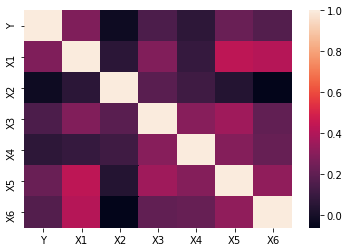

In [11]:
sns.heatmap(data.corr())


In [12]:
data.corr()


,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


## DATA CLEANING

In [13]:

X=data.drop(columns = 'Y')
y = data['Y']

In [14]:
y.value_counts()

1    69
0    57
Name: Y, dtype: int64

In [15]:
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False)

,feature,feature importance
0,X1,0.0894098
4,X5,0.0254522
2,X3,0.00621895
1,X2,0.00530286
5,X6,0.00162695
3,X4,0.000103252


In [16]:
X=X.drop(columns = 'X4')



In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

## MODELING

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

# 10-Fold Cross validate model and evaluate recall
knn_cv_results = cross_validate(KNeighborsClassifier(n_neighbors=5), X, y, cv=10, 
                            scoring=['recall']) 

knn_score = knn_cv_results['test_recall'].mean()
print(knn_score)


0.6261904761904762


In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

features = ['X1', "X2", "X3", "X5", "X6"]
logit_one = smf.logit(formula='y ~'+ ' + '.join(features), data=X).fit()
print(logit_one.summary())

Optimization terminated successfully.
         Current function value: 0.637877
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  126
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            5
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:                 0.07367
Time:                        13:48:09   Log-Likelihood:                -80.373
converged:                       True   LL-Null:                       -86.764
Covariance Type:            nonrobust   LLR p-value:                   0.02550
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5812      1.381     -2.594      0.009      -6.287      -0.875
X1             0.5748      0.

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
clf.predict(X_test_scaled)

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [24]:
clf.score(X_test_scaled, y_test)

0.53125

In [25]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model = SVC(kernel='linear')
cross_val_score(model, X_train_scaled, y_train, cv=5).mean()

CPU times: user 30.2 ms, sys: 2.67 ms, total: 32.9 ms
Wall time: 31.3 ms


0.5321637426900585

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
# Instanciate model
model = SVC()

# Hyperparameter search space
search_space = {
    'kernel': ['linear','poly','rbf','sigmoid'],
    'C': stats.uniform(0.01, 1000),
    'degree': stats.randint(1,10),
    
    
    #'degree': stats.randint(1, 5),
}

# Instanciate Random Search
rsearch = RandomizedSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=10, n_iter=2000, verbose=0)

In [27]:
%%time
rsearch.fit(np.array(X_train_scaled), np.array(y_train))

CPU times: user 27.6 s, sys: 1.34 s, total: 28.9 s
Wall time: 10min 27s


RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=2000, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1251efc10>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1251efe50>,
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy')

In [28]:
rsearch.best_params_

{'C': 22.952542217782916, 'degree': 4, 'kernel': 'poly'}

In [29]:
rsearch.best_score_

0.7122222222222223

In [30]:
model = rsearch.best_estimator_
model.fit(X_train_scaled, y_train)
print(cross_val_score(model, X_train_scaled, y_train, cv=10).mean())

0.7122222222222223


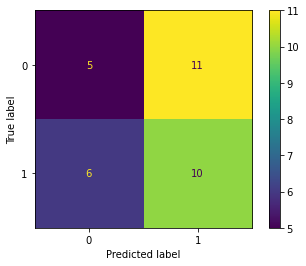

In [31]:
from sklearn.metrics import plot_confusion_matrix
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)
plot_confusion_matrix(model, X_test_scaled, y_test)

In [32]:
from sklearn.metrics import classification_report

# Use model to predict
y_pred = model.predict(scaler.transform(X_test))

# Compare predictions and true values to produce classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.48      0.62      0.54        16

    accuracy                           0.47        32
   macro avg       0.47      0.47      0.46        32
weighted avg       0.47      0.47      0.46        32

